# ЛАБОРАТОРНА РОБОТА 
## "Елементи конструювання ознак в МН"

## Теоретичне введення

[Конструювання ознак](https://ru.wikipedia.org/wiki/Конструирование_признаков) (_feature engineering_) - це процес створення нових ознак/показчиків або модифікації існуючих для поліпшення продуктивності моделей машинного навчання. 

__Ціль__ цього етапу - визначати основні закономірності в даних, які є актуальними для вирішуваної проблеми, та представити цю інформацію в формах та форматах, які можуть використовувати алгоритми машинного навчання.

### Важливість

## Завдання

В даних ретейл-компанії які знаходяться в файлі `apartments.csv` та відображаютьв відомості про продажі квартир на вторинному ринку зробити наступне:
1. Провести попередній аналіз структури даних
2. Знайти та видалити дубльовані рядки
3. Провести реконструкцію пропущених даних
4. Розробити та додати нові ознаки
5. Зберегти оброблені дані в файлі `apartments_clean.csv`

__*Завдання виконувати послідовно додержуючись інструкцій та коментарів*__

__ДОДАТКОВІ МАТЕРІАЛИ__:
- [Exploratory Data Analysis with Pandas](https://www.kaggle.com/code/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
- [20 Must-Know Pandas Function for Exploratory Data Analysis](https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/)
- [Програма скрапінгу сайту Lun](https://github.com/sergei8/parser_lun)

### 1. Підготовка 

це є етап де відбувається 'знайомство' з датасетом, тобто визначення його загального стану та формудювання задач його поліпшення

__Корисні посилання__:
- [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- [pandas.DataFrame.duplicated](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)

In [1]:
# імпортувати необхідні бібліотеки
import pandas as pd

In [2]:
# створити датафрейм з ім'ям 'apartments' з файлу 'apartments.csv'
apartments = pd.read_csv("kijv_apartments.csv")

In [3]:
# вивести загальну інформацію про датафрейм (head, info, describe, ...)
apartments.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,publish_date
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,Омеляновича-Павленка,3 вересня 2020 р.
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,NaN,7 жовтня 2020 р.
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,NaN,NaN,Ованеса Туманяна,1 жовтня 2020 р.
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,1 лютого
4,82000.0,2.0,1281.0,18.0,26.0,NaN,64.0,NaN,NaN,Дніпровська,NaN


In [4]:
apartments.describe()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen
count,7.280000e+02,724.000000,723.000000,703.000000,703.000000,540.000000,640.000000,497.000000,524.000000
mean,2.001384e+05,2.226519,2090.259059,9.631579,17.695590,1996.662963,79.928125,42.301811,15.881679
std,6.748939e+05,1.027190,5900.910584,6.931243,8.458113,27.125786,51.143278,30.571793,10.043182
min,1.009210e+04,1.000000,478.000000,1.000000,2.000000,1860.000000,15.000000,10.000000,3.000000
25%,6.500000e+04,1.000000,1147.000000,4.000000,9.000000,1977.000000,50.000000,25.000000,10.000000
50%,1.039500e+05,2.000000,1562.000000,8.000000,19.000000,2010.000000,68.500000,37.000000,14.000000
75%,1.700000e+05,3.000000,2188.000000,14.000000,25.000000,2016.000000,92.250000,50.000000,18.000000
max,1.570000e+07,7.000000,157000.000000,33.000000,47.000000,2021.000000,520.000000,320.000000,78.000000


In [5]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         728 non-null    float64
 1   rooms         724 non-null    float64
 2   price_per_m2  723 non-null    float64
 3   level         703 non-null    float64
 4   levels        703 non-null    float64
 5   year          540 non-null    float64
 6   area_total    640 non-null    float64
 7   area_living   497 non-null    float64
 8   area_kitchen  524 non-null    float64
 9   street        688 non-null    object 
 10  publish_date  550 non-null    object 
dtypes: float64(9), object(2)
memory usage: 62.7+ KB


In [6]:
apartments.columns

Index(['Price', 'rooms', 'price_per_m2', 'level', 'levels', 'year',
       'area_total', 'area_living', 'area_kitchen', 'street', 'publish_date'],
      dtype='object')

In [7]:
apartments.isna().sum()

Price             0
rooms             4
price_per_m2      5
level            25
levels           25
year            188
area_total       88
area_living     231
area_kitchen    204
street           40
publish_date    178
dtype: int64

In [8]:
# вивести кількість дубльованих рядків (якщо воні є)
apartments.duplicated().sum()

52

#### Висновки по 1 етапу:
[_тут треба коротко написати та скільки в якому стані знаходиться досліджуємий датасет:
загальна кількість значущих рядків та показчиків, наявнісь пропущених та дубльованих даних та ін._ та подальші дії з даними]

Маємо датасет довжиною 728 рядків, 11 стовпців. 52 дубльованих рядки, пропущені значення по кожному стовпцю:
Price             0
rooms             4
price_per_m2      5
level            25
levels           25
year            188
area_total       88
area_living     231
area_kitchen    204
street           40
publish_date    178
Тип даних числових стовпців float, текстових - object.

Два стовцпі, які не є значущими "вулиця" та "дата публікації" можна видалити. Також видалити дубльовані рядки, замінити пропущені значення.

### 2. Поліпшення структури

На цьому етапі треба привести структуру датасету к необхідній для дослідження, а саме
- видалити незначащі показчики (колонки)
- видалити дубльовані спостереження (рядки)
- змінити формати показчиків

__Корисні посилання__:
- [pandas.DataFrame.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
- [pandas.DataFrame.drop_duplicates
](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [9]:
# видалити показчик 'publish_date'
apartments.drop(columns = ['publish_date'], inplace=True)

In [10]:
# видалити дубльовані рядки
apartments.drop_duplicates(inplace=True)

In [11]:
#  проінспектувати поточний датасет
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 727
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         676 non-null    float64
 1   rooms         672 non-null    float64
 2   price_per_m2  671 non-null    float64
 3   level         652 non-null    float64
 4   levels        652 non-null    float64
 5   year          501 non-null    float64
 6   area_total    594 non-null    float64
 7   area_living   461 non-null    float64
 8   area_kitchen  488 non-null    float64
 9   street        638 non-null    object 
dtypes: float64(9), object(1)
memory usage: 58.1+ KB


In [12]:
apartments.duplicated().sum()

0

#### Висновки по 2 єтапу: 

[_згідно отриманих характеристик, написати чи годний датасет для подальшої роботи_]

    Видалили дублікати, непотрібні стовпці - датасет вже виглядає краще, але все ще не придатний для подальшої роботи. Треба позбутись пустих значень.

### 3. Відновлення пропущених значень

на цьому етапі треба відновити `NaN` значення в показчиках, вибравши та застосувавші відповідну стратегію

__Корисні посилання__:
- [Working with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html)
- [Missing values in pandas (nan, None, pd.NA)](https://note.nkmk.me/en/python-pandas-nan-none-na/)

In [13]:
# заповнити незначащі числові показчики медіаной відповідної колонки
apartments.fillna(apartments.median(), axis=0, inplace=True)

In [14]:
# заповнити незначащі категоріальні показчики вибравши стратегію "найближчий попередній (bfill)"
apartments['street'] = apartments["street"].fillna(method="bfill")

In [15]:
# проінспетувати стан отриманого датасету
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 0 to 727
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         676 non-null    float64
 1   rooms         676 non-null    float64
 2   price_per_m2  676 non-null    float64
 3   level         676 non-null    float64
 4   levels        676 non-null    float64
 5   year          676 non-null    float64
 6   area_total    676 non-null    float64
 7   area_living   676 non-null    float64
 8   area_kitchen  676 non-null    float64
 9   street        676 non-null    object 
dtypes: float64(9), object(1)
memory usage: 58.1+ KB


In [16]:
apartments.describe()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen
count,6.760000e+02,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,1.980334e+05,2.235207,2078.428846,9.500000,17.637574,1999.593195,78.810651,40.828402,15.377219
std,6.797337e+05,1.029636,6078.255527,6.790516,8.314931,24.288791,48.495769,25.926509,8.528541
min,1.009210e+04,1.000000,478.000000,1.000000,2.000000,1860.000000,15.000000,10.000000,3.000000
25%,6.500000e+04,1.000000,1146.875000,4.000000,9.000000,1995.000000,52.000000,30.000000,11.000000
50%,1.034500e+05,2.000000,1550.000000,8.000000,18.000000,2009.000000,69.000000,37.000000,14.000000
75%,1.689018e+05,3.000000,2158.275000,14.000000,25.000000,2015.000000,89.000000,43.000000,16.000000
max,1.570000e+07,7.000000,157000.000000,33.000000,47.000000,2021.000000,520.000000,320.000000,78.000000


#### Висновки по 3 етапу:
[_обгрунтуйте, чому було вибрано саме ті стратегії відновлення та їх внесок в поліпшення якості даних_]

Для пустих числових значень ми використали медіанне значення для заміни, що дозволить нам заповнити ці дані так, щоб  не зіпсувати реальні дані. Для категоріального показчика "street" ми використали метод найближчий попередній, аби не видаляти зайві рядки, де може бути всього одне значення пропущене але заповнити їх так, щоб дані не виглядали фальсифікованими.

### 4. Конструювання нових ознак

Цей єтап призначено для поліпшення _'інформативности'_ даних за рахунок додання похідних даних з комбінацій існуючих та/або з зовнішніх джерел

__Корисні посилання__:
- [Feature Engineering Using Pandas for Beginners](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj03-Hov4H9AhWKvYsKHVUnDoIQFnoECAsQAQ&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2020%2F12%2Ffeature-engineering-using-pandas-for-beginners%2F&usg=AOvVaw3He3iUI_tjBLwwpGEjsYt0)
- [pandas.DataFrame.join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)

#### 4.1 створити нову колонку `district` використовуючі дані, що знаходяться в файлі 'kijv_districts.csv'

In [17]:
# створити датафрейм `districts` з файлу kiev-districts.csv
districts = pd.read_csv("kijv_districts.csv")

In [18]:
# написати код, який співвідностить значення показчика `street` обох датасетах та вибирає відповініий вулиці район
full_kyiv = pd.merge(apartments, districts, on="street")
full_kyiv

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,type,district
0,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,площа,Оболонський
1,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,вулиця,Подільський
2,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,вулиця,Оболонський
3,135000.0,2.0,2077.0,16.0,23.0,2012.0,65.0,25.0,18.0,Дніпровська,вулиця,Оболонський
4,84000.0,2.0,1273.0,6.0,26.0,2009.0,66.0,37.0,18.0,Дніпровська,вулиця,Оболонський
...,...,...,...,...,...,...,...,...,...,...,...,...
478,42900.0,2.0,998.0,1.0,5.0,2009.0,43.0,29.0,14.0,Іскрівська,вулиця,Солом'янський
479,115000.0,1.0,2614.0,2.0,7.0,2019.0,44.0,14.0,21.0,Теремківська,вулиця,Голосіївський
480,39000.0,1.0,1147.0,3.0,5.0,1960.0,34.0,18.0,8.0,Автозаводська,вулиця,Оболонський
481,115000.0,3.0,1135.0,13.0,25.0,2004.0,69.0,37.0,14.0,Здолбунівська,вулиця,Дарницький


#### 4.2 створити нову колонку `area_comfort` на по наступній формулі:

__area_comfort = area_total - area_living - area_kitchen__

_передбачити контроль на позитивне значення результата_

In [19]:
full_kyiv['area_comfort'] = full_kyiv['area_total'] - full_kyiv['area_living'] - full_kyiv['area_kitchen']
full_kyiv

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,type,district,area_comfort
0,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,площа,Оболонський,10.0
1,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,вулиця,Подільський,10.0
2,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,вулиця,Оболонський,13.0
3,135000.0,2.0,2077.0,16.0,23.0,2012.0,65.0,25.0,18.0,Дніпровська,вулиця,Оболонський,22.0
4,84000.0,2.0,1273.0,6.0,26.0,2009.0,66.0,37.0,18.0,Дніпровська,вулиця,Оболонський,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,42900.0,2.0,998.0,1.0,5.0,2009.0,43.0,29.0,14.0,Іскрівська,вулиця,Солом'янський,0.0
479,115000.0,1.0,2614.0,2.0,7.0,2019.0,44.0,14.0,21.0,Теремківська,вулиця,Голосіївський,9.0
480,39000.0,1.0,1147.0,3.0,5.0,1960.0,34.0,18.0,8.0,Автозаводська,вулиця,Оболонський,8.0
481,115000.0,3.0,1135.0,13.0,25.0,2004.0,69.0,37.0,14.0,Здолбунівська,вулиця,Дарницький,18.0


#### Висновки по 4 етапу:
[_обгрунтуйте, яка на Вашу думку мотивація додання цих колонок до існуючого датасету, чому вони зможуть підвищіти якість навчання моделі_]

Cуть поєднання двох датасетів полягає в тому, що дані будуть доповнені. Окрім назви вулиці, нам буде відомо її тип та район. Мотивація додавання колонки "area_comfort" в тому, що нам буде відома "корисна площа" квартири.

### 5. Зберігання результата

Написати код, який зберігає поточний робочий датафрейм у файл з ім'ям `apatrments_clean.csv`

__Примітка__: в вихідному файлі передбачити імена колонок в першому рядку та не зберігати
індекси рядків (нумерацію строк) 

In [20]:
full_kyiv.to_csv("apartments_clean.csv", header=True, index=False)

### 6.  Візуалізація та прикінцеві висновки

Цей єтап є заключним на статдії підготовки даних для МН та його ціль - довести надійність вхідних даних та їх здатність адекватно відображати стан вивчаємого обїєкта або явища

__Корисні посилання__:
- [Python Data Visualization for Beginners](https://realpython.com/pandas-plot-python/)
- [How To Perform Data Visualization with Pandas](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiV2vL79IP9AhVE6CoKHYeiDAMQFnoECB8QAQ&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2021%2F07%2Fhow-to-perform-data-visualization-with-pandas%2F&usg=AOvVaw3-o5cFLKfTWGV5WbnuUaFm)
- [Plotting with matplotlib](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html)

#### 6.1 Аналіз взаємозв'язків показчиків з цільвою змінною

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

<function matplotlib.pyplot.show(close=None, block=None)>

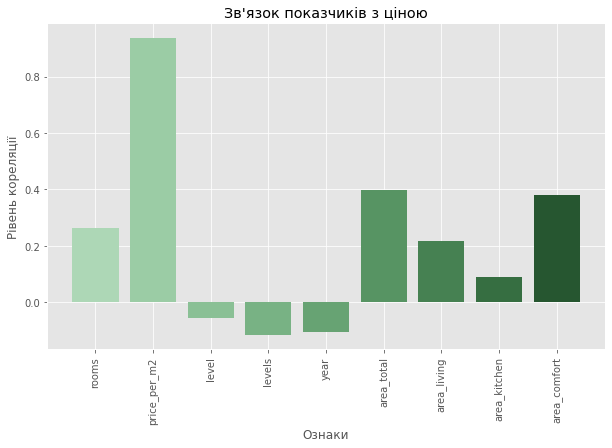

In [22]:
# побудувати гістограму кореляцій показчиків з ціною квартири

plot_data = full_kyiv.corr()['Price']
plot_data.drop(['Price'], inplace=True)


plt.figure(figsize=(10,6))
plt.bar(plot_data.index, plot_data,
               color = sns.cubehelix_palette(start=2, rot = 0, n_colors=9, light=.7, gamma=.7))
plt.title("Зв'язок показчиків з ціною")
plt.xlabel("Ознаки")
plt.ylabel("Рівень кореляції")
plt.xticks(rotation=90)


plt.show

#### Приклад очікуваного графіка

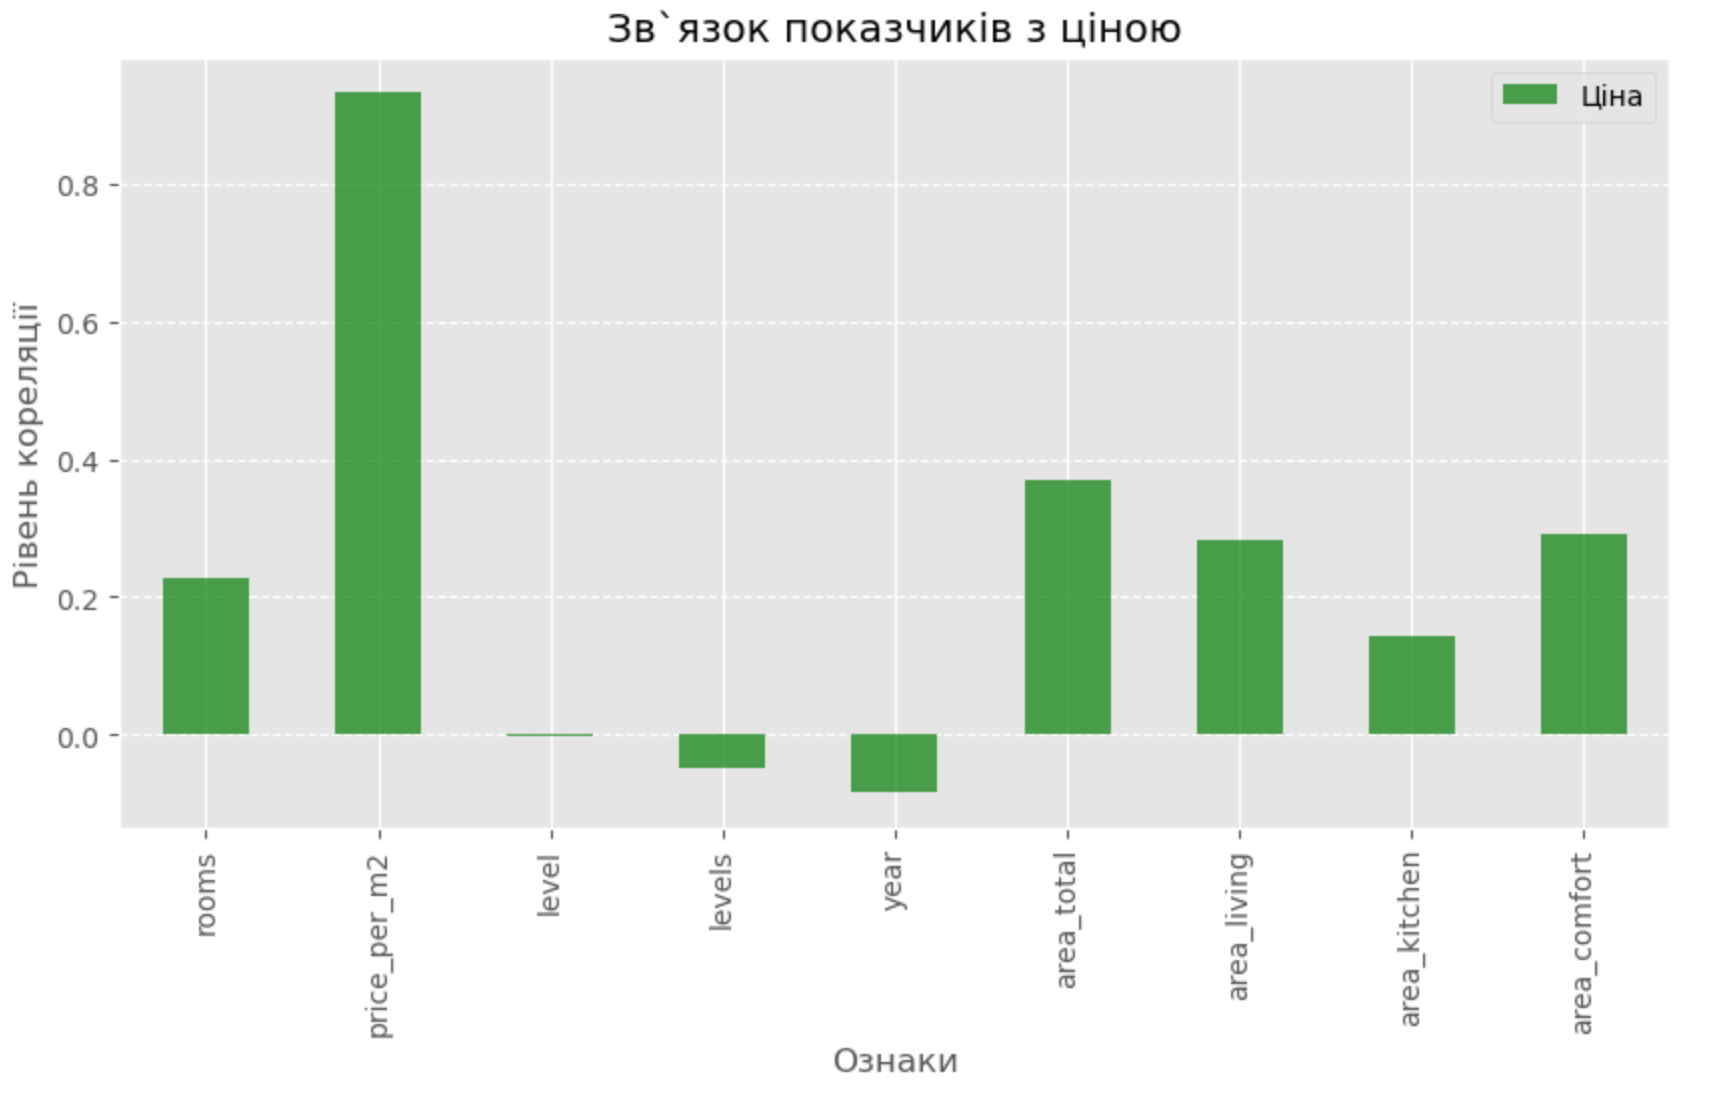

<AxesSubplot:>

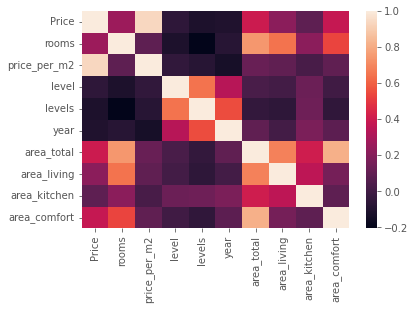

In [23]:
#Також можемо переглянути корреляцію усіх показчиків
sns.heatmap(full_kyiv.corr())

#### 6.2 Аналіз варіативноті ознак

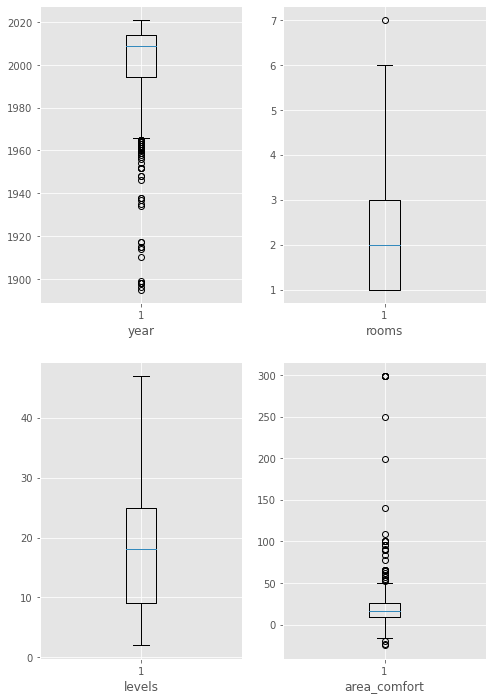

In [24]:
# Побудувати діаграми розмаху для декількох показчиків
fig, ax = plt.subplots(2, 2, figsize=(8, 12))

ax[0, 0].boxplot(full_kyiv['year'])
ax[0, 0].set_xlabel('year')
ax[0, 1].boxplot(full_kyiv['rooms'])
ax[0, 1].set_xlabel('rooms')
ax[1, 0].boxplot(full_kyiv['levels'])
ax[1, 0].set_xlabel('levels')
ax[1, 1].boxplot(full_kyiv['area_comfort'])
ax[1, 1].set_xlabel('area_comfort')


plt.show()

[Диаграмма размаха ("ящик с усами")](https://datavizcatalogue.com/RU/metody/diagramma_razmaha.html)

#### Приклад очікуваного графіка

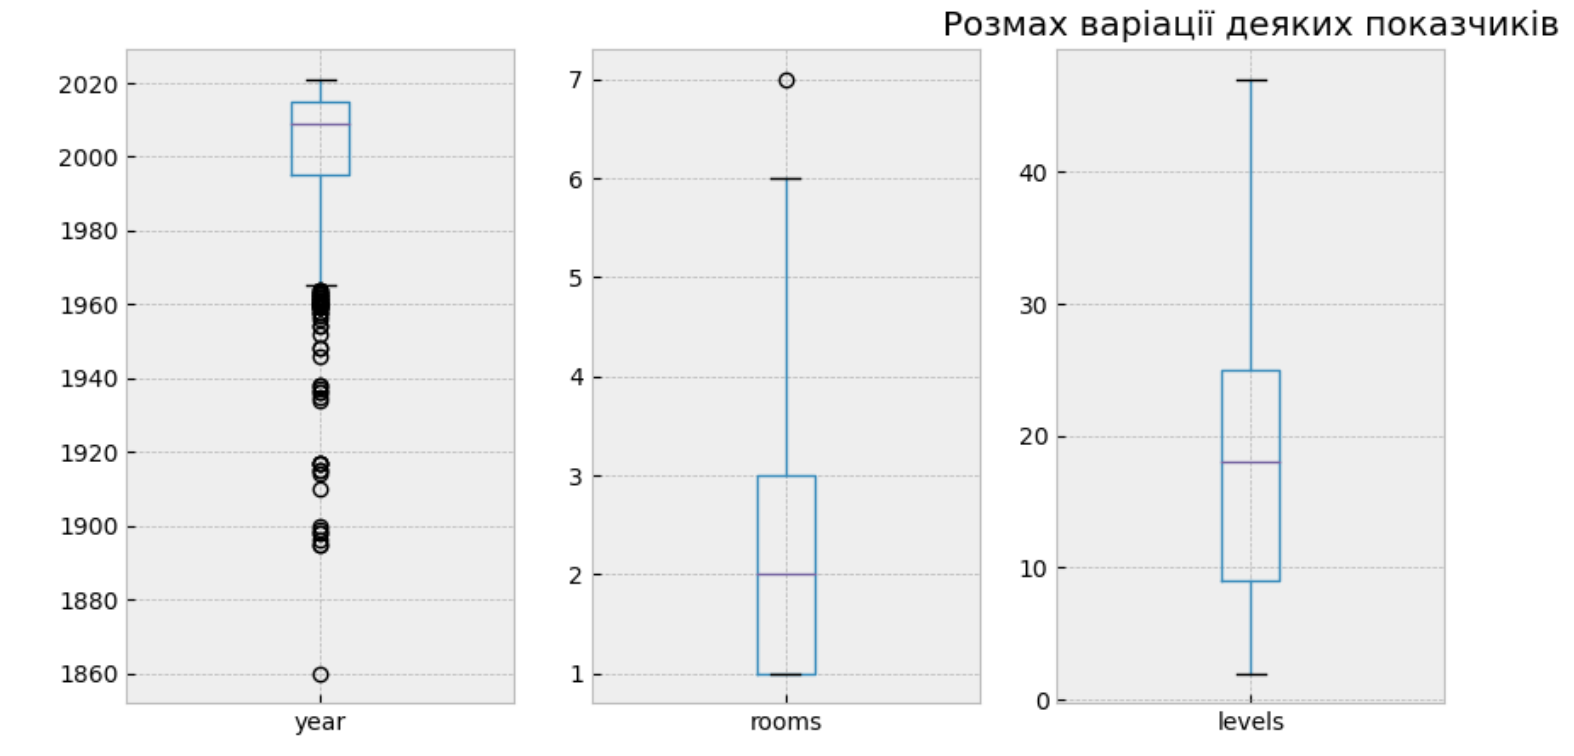

### ВИСНОВКИ:

1. Значення ціни напряму корелює з показчиком ціни за метр квадратний і меньшою мірою з загальною площею.
2. Кількість кімнат в середньому в квартирах становить від 1 до 3.
3. Корисна площа квартир в середньому лежить між 10-30 метрів квадратних. Серед значень корисної площі, маємо викиди, такі як 300, 250, 200 квадратних метрів. 
4. Невелика кореляція прослідковується між кількість кімнат та загальною площею.